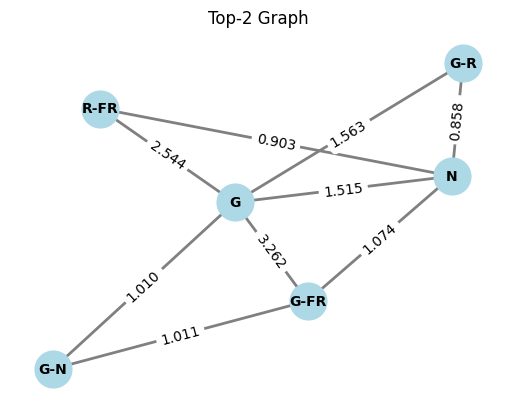

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_excel('distance_clusters1.xlsx', header=0, index_col=0)

node_labels = df.columns.tolist()
weights_matrix = df.to_numpy()
k = 2
G = nx.Graph()
for i, node_i in enumerate(node_labels):
    for j, node_j in enumerate(node_labels[i+1:], start=i+1):  # Avoid duplicating edges and self-loops
        weight = round(weights_matrix[i][j], 3)  
        G.add_edge(node_i, node_j, weight=weight)


G_top_k = nx.Graph()
G_top_k.add_nodes_from(node_labels)  

for node in G.nodes:
    # Sort edges of the current node based on weight, descending (for heaviest)
    edges = sorted(G.edges(node, data=True), key=lambda x: x[2]['weight'], reverse=True)[:k]
    for edge in edges:
        G_top_k.add_edge(edge[0], edge[1], weight=edge[2]['weight'])


pos = nx.spring_layout(G_top_k)  
nx.draw_networkx_nodes(G_top_k, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G_top_k, pos, width=2.0, edge_color='gray')
nx.draw_networkx_labels(G_top_k, pos, font_size=10, font_weight='bold')
edge_labels = {edge: f"{weight:.3f}" for edge, weight in nx.get_edge_attributes(G_top_k, 'weight').items()}
nx.draw_networkx_edge_labels(G_top_k, pos, edge_labels=edge_labels)
plt.title("Top-2 Graph")
plt.axis('off')
plt.show()


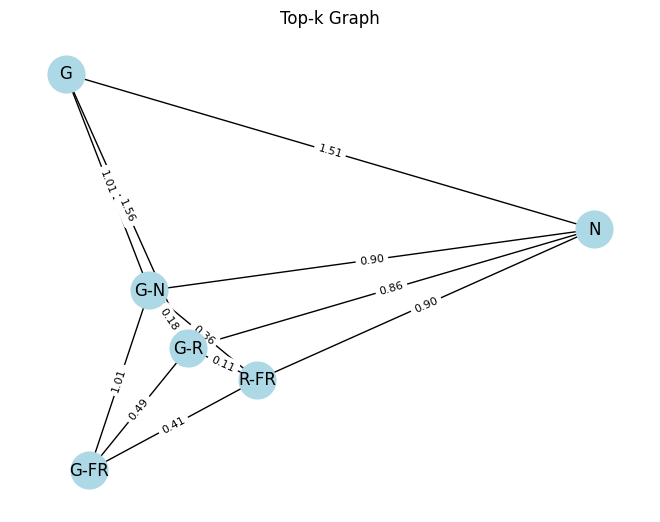

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
excel_path = 'distance_clusters1.xlsx'  # Update this to your Excel file's path
k = 3  # The number of smallest edges to keep for each node

# Read the Excel file
df = pd.read_excel(excel_path, index_col=0)

# Initial graph construction
G_initial = nx.Graph()

for i, row in df.iterrows():
    for j, weight in row.iteritems():
        # Exclude self-loops and missing weights
        if pd.notna(weight) and i != j:
            G_initial.add_edge(i, j, weight=weight)

# Create a new graph to hold the final structure
G_final = nx.Graph()

# Process each node to keep only the k smallest edges, if available
for node in G_initial.nodes:
    edges = list(G_initial.edges(node, data=True))
    # Sort edges by weight
    edges.sort(key=lambda x: x[2]['weight'])
    # Keep up to k smallest edges
    smallest_edges = edges[:k]
    for edge in smallest_edges:
        source, target, data = edge
        G_final.add_edge(source, target, weight=data['weight'])

# Now, adjust weights for layout calculation, emphasizing smaller weights
for u, v, d in G_final.edges(data=True):
    # Use a non-linear transformation for the weights
    # Adjusting the transformation to avoid division by zero and to make small weights more pronounced
    d['weight'] = 1.0 / (d['weight'] ** 2 if d['weight'] else 1)

# Generate positions using the spring layout
pos = nx.spring_layout(G_final, weight='weight')

# Draw the final graph
nx.draw(G_final, pos, with_labels=True, edge_color='black', width=1,
        node_size=700, node_color='lightblue', edge_cmap=plt.cm.Blues)

# Draw edge labels to show the original weights, with smaller font size
edge_labels = {(u, v): '{:.2f}'.format(1/((d['weight'])**0.5)) for u, v, d in G_final.edges(data=True)}
nx.draw_networkx_edge_labels(G_final, pos, edge_labels=edge_labels, font_size=8)

# Display the graph
plt.title("Top-k Graph")
plt.show()
